In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('C:/Users/ASUS/Desktop/python_datasets/imarticus/Pranjal_Sir/CTG.csv')

In [3]:
file.head()

,LB,AC,FM,NSP
0,120,0.000,0.0,2
1,132,0.006,0.0,1
2,133,0.003,0.0,1
3,134,0.003,0.0,1
4,132,0.007,0.0,1


In [4]:
file.isna().sum()

LB     0
AC     0
FM     0
NSP    0
dtype: int64

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      2126 non-null   int64  
 1   AC      2126 non-null   float64
 2   FM      2126 non-null   float64
 3   NSP     2126 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 66.6 KB


In [5]:
from sklearn.model_selection import train_test_split

In [11]:
f_train, f_test = train_test_split(file, train_size=0.8, random_state=0)

In [18]:
f_trainx = f_train.iloc[:,0:3:]
f_trainy = f_train.iloc[:,-1::]
f_testx = f_test.iloc[:,0:3:]
f_testy = f_test.iloc[:,-1::]

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier(max_depth=4)

In [43]:
dt.fit(f_trainx, f_trainy)

DecisionTreeClassifier(max_depth=4)

In [44]:
pred = dt.predict(f_testx)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
accuracy_score(f_testy, pred)

0.823943661971831

In [47]:
confusion_matrix(f_testy, pred)

array([[311,  14,   1],
       [ 25,  31,   2],
       [ 30,   3,   9]], dtype=int64)

In [66]:
# drawing the decision tree
pip install pydotplus

SyntaxError: invalid syntax (Temp/ipykernel_2968/293718825.py, line 2)

In [61]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [71]:
conda install graphviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\ASUS\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py39haa95532_0         888 KB
    conda-build-3.22.0         |   py39haa95532_0         541 KB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    m2-msys2-runtime-2.5.0.17080.65c939c|                3         3.0 MB
    m2-patch-2.7.5             |                2          89 KB
    ----------------------------------------------

In [69]:


from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus
import pydot 

from six import StringIO

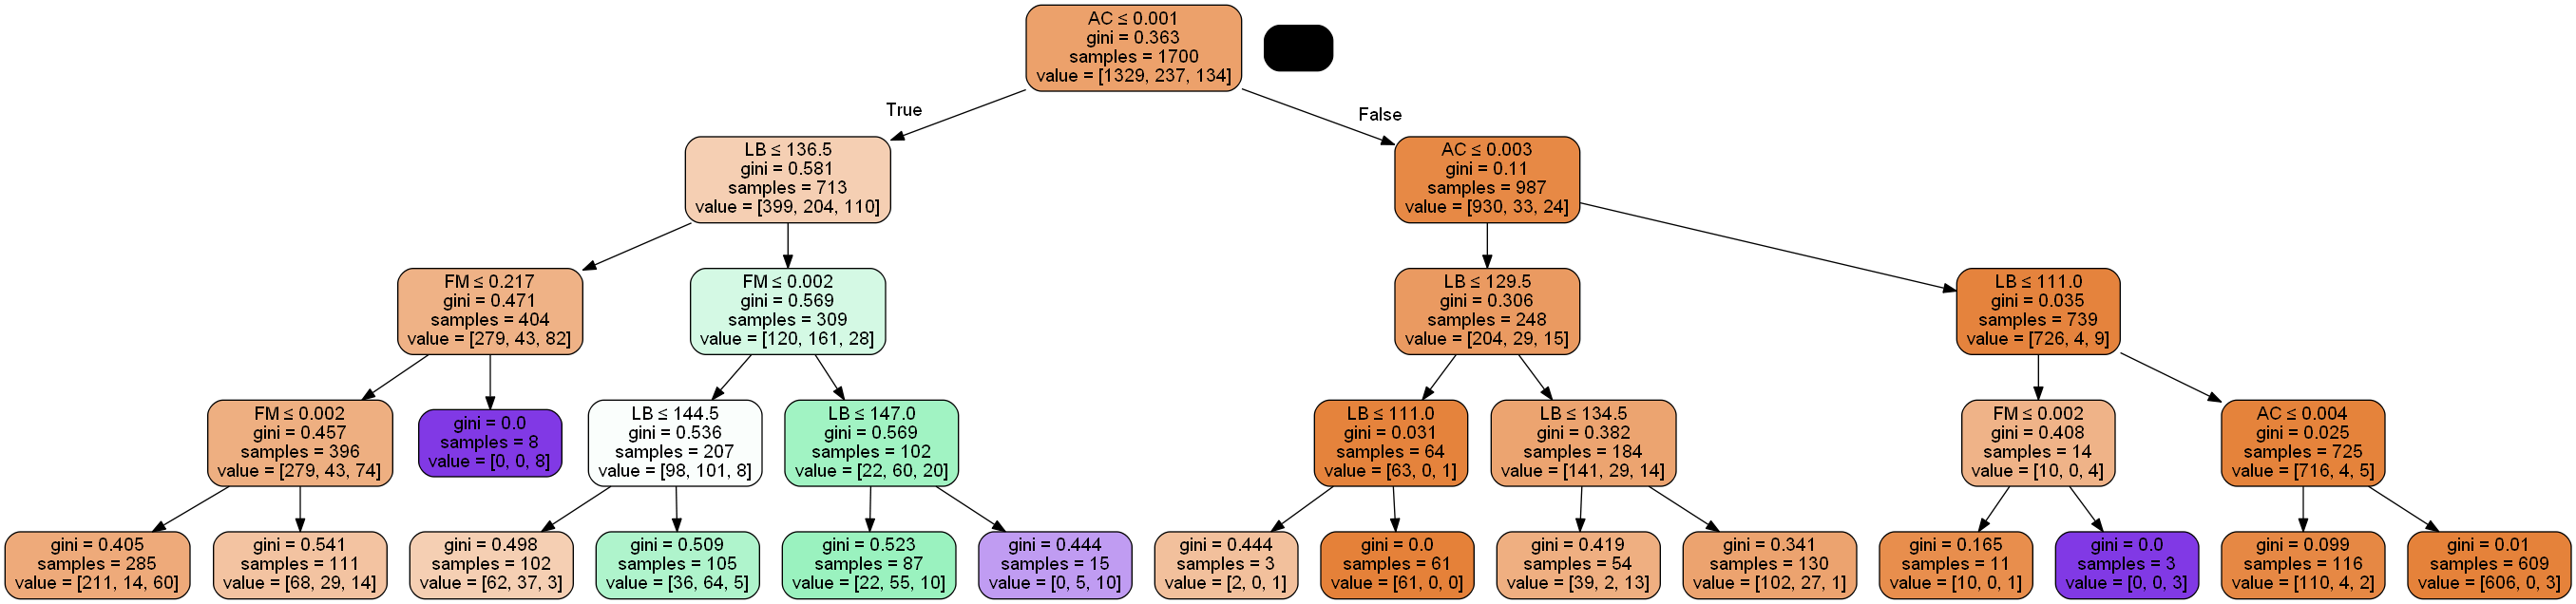

<Figure size 864x864 with 0 Axes>

In [72]:
f_trainx_names = f_trainx.columns
dot_data = StringIO()

fig = plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names= f_trainx_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())